In [311]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [312]:
import plotly.express as px

In [313]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [314]:
gdp = pd.read_csv('../data/gdp_per_capita.csv')
gdp.rename(columns={"Country or Area": "Country",'Value':'GDP'}, inplace=True)
gdp.drop(columns=['Value Footnotes'], axis = 1, inplace=True)
gdp.head()

,Country,Year,GDP
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [315]:
gdp['Year'] = gdp['Year'].astype(str)

In [316]:
women_labor = pd.read_csv('../data/women_labor.csv')
women_labor.head(1)

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Female 15+ yr,2006.0,ILO_KILM Database 5ed_2007,Percent,29.4,NaN


In [317]:
women_labor.drop(columns=['Subgroup','Source','Unit','Value Footnotes'], axis = 1, inplace=True)
women_labor.rename(columns={'Country or Area': "Country",'Value':'Wmn_Labor_Share'}, inplace=True)
women_labor.head()

,Country,Year,Wmn_Labor_Share
0,Afghanistan,2006.0,29.4
1,Afghanistan,2005.0,29.0
2,Afghanistan,2004.0,28.8
3,Afghanistan,2003.0,28.8
4,Afghanistan,2002.0,28.6


In [318]:
women_labor['Year'] = women_labor['Year'].astype(str).apply(lambda x: x.replace('.0',''))
women_labor.head()

,Country,Year,Wmn_Labor_Share
0,Afghanistan,2006,29.4
1,Afghanistan,2005,29.0
2,Afghanistan,2004,28.8
3,Afghanistan,2003,28.8
4,Afghanistan,2002,28.6


In [319]:
women_gdp = pd.merge(women_labor, gdp, on=['Country','Year'], how='inner')
women_gdp.head()

,Country,Year,Wmn_Labor_Share,GDP
0,Afghanistan,2006,29.4,1315.789117
1,Afghanistan,2005,29.0,1286.793659
2,Afghanistan,2004,28.8,1200.278013
3,Afghanistan,2003,28.8,1235.810063
4,Afghanistan,2002,28.6,1189.784668


In [320]:
women_gdp_cont = pd.merge(women_gdp, continents, on=['Country'], how='inner')
women_gdp_cont.head()

,Country,Year,Wmn_Labor_Share,GDP,Continent
0,Afghanistan,2006,29.4,1315.789117,Asia
1,Afghanistan,2005,29.0,1286.793659,Asia
2,Afghanistan,2004,28.8,1200.278013,Asia
3,Afghanistan,2003,28.8,1235.810063,Asia
4,Afghanistan,2002,28.6,1189.784668,Asia


In [321]:
Angola = women_gdp_cont.query("Country == 'Angola'")
Angola = Angola[['Wmn_Labor_Share', 'GDP']].corr()
AngolaValue = Angola.loc[['GDP'],['Wmn_Labor_Share']].values[0]
print(AngolaValue)

[-0.26063509]


In [322]:
women_gdp_cont_06 = women_gdp_cont[women_gdp_cont['Year']=='2006']
women_gdp_cont_06.head()

,Country,Year,Wmn_Labor_Share,GDP,Continent
0,Afghanistan,2006,29.4,1315.789117,Asia
5,Albania,2006,42.0,8568.561885,Europe
22,Algeria,2006,31.1,10527.408693,Africa
39,Angola,2006,45.8,6652.861593,Africa
56,Argentina,2006,43.3,20777.652710,South America


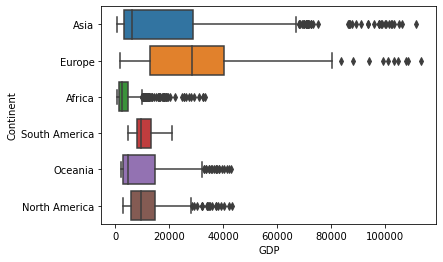

In [323]:
sns.boxplot(y=women_gdp_cont["Continent"], x=women_gdp_cont["GDP"] );
plt.show()

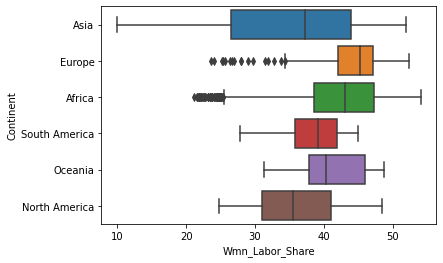

In [324]:
sns.boxplot(y=women_gdp_cont["Continent"], x=women_gdp_cont["Wmn_Labor_Share"] );
plt.show()

In [325]:
Asia = women_gdp_cont.query("Continent == 'Asia'")
Asia = Asia[['Wmn_Labor_Share', 'GDP']].corr()
AsiaValue = Asia.loc[['GDP'],['Wmn_Labor_Share']].values[0]
print(AsiaValue)

[-0.52326793]


In [326]:
Europe = women_gdp_cont.query("Continent == 'Europe'")
Europe = Europe[['Wmn_Labor_Share', 'GDP']].corr()
EuropeValue = Europe.loc[['GDP'],['Wmn_Labor_Share']].values[0]
print(EuropeValue)

[-0.26799575]


In [327]:
Africa = women_gdp_cont.query("Continent == 'Africa'")
Africa = Africa[['Wmn_Labor_Share', 'GDP']].corr()
AfricaValue = Africa.loc[['GDP'],['Wmn_Labor_Share']].values[0]
print(AfricaValue)

[-0.43571136]


In [328]:
SouthAmerica = women_gdp_cont.query("Continent == 'South America'")
SouthAmerica = SouthAmerica[['Wmn_Labor_Share', 'GDP']].corr()
SouthAmericaValue = SouthAmerica.loc[['GDP'],['Wmn_Labor_Share']].values[0]
print(SouthAmericaValue)

[-0.12477648]


In [329]:
Oceania = women_gdp_cont.query("Continent == 'Oceania'")
Oceania = Oceania[['Wmn_Labor_Share', 'GDP']].corr()
OceaniaValue = Oceania.loc[['GDP'],['Wmn_Labor_Share']].values[0]
print(OceaniaValue)

[0.27471808]


In [330]:
NorthAmerica = women_gdp_cont.query("Continent == 'North America'")
NorthAmerica = NorthAmerica[['Wmn_Labor_Share', 'GDP']].corr()
NorthAmericaValue = NorthAmerica.loc[['GDP'],['Wmn_Labor_Share']].values[0]
print(NorthAmericaValue)

[0.4149569]


In [333]:
test_dict = {
  "Continents": ['Asia','Europe','Africa','South America','Oceania','North America'],
  "Corr Coef": [-0.52326793,-0.26799575,-0.43571136,-0.12477648,0.27471808,0.4149569]
}

#load data into a DataFrame object:
corr_cont = pd.DataFrame(test_dict)

In [334]:
corr_cont

,Continents,Corr Coef
0,Asia,-0.523268
1,Europe,-0.267996
2,Africa,-0.435711
3,South America,-0.124776
4,Oceania,0.274718
5,North America,0.414957


## UN Solo Project

#### Datasets: 'Country GDP' and 'Women Share of Labor Force'
#### Question: What is the relationship between GDP and % of Women Working

In [335]:
women_gdp_cont.head(3)

,Country,Year,Wmn_Labor_Share,GDP,Continent
0,Afghanistan,2006,29.4,1315.789117,Asia
1,Afghanistan,2005,29.0,1286.793659,Asia
2,Afghanistan,2004,28.8,1200.278013,Asia


In [336]:
women_gdp_cont.shape

(2449, 5)

In [337]:
women_gdp_cont['Country'].nunique()

150

In [338]:
print (women_gdp_cont.Year.min())
print (women_gdp_cont.Year.max())

1990
2006


#### Question: What is the relationship between GDP and % of Women Working

In [339]:
women_gdp_cont[['Wmn_Labor_Share', 'GDP']].corr()

,Wmn_Labor_Share,GDP
Wmn_Labor_Share,1.000000,-0.224964
GDP,-0.224964,1.000000


In [340]:
corr_cont.head(6)

,Continents,Corr Coef
0,Asia,-0.523268
1,Europe,-0.267996
2,Africa,-0.435711
3,South America,-0.124776
4,Oceania,0.274718
5,North America,0.414957


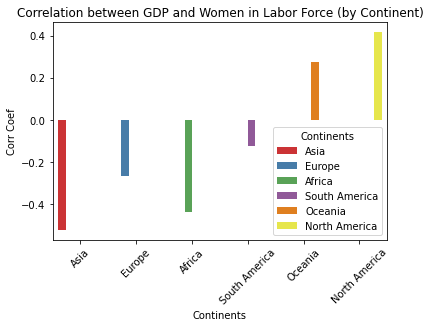

In [342]:
sns.barplot(data=corr_cont, x = "Continents", y="Corr Coef", hue="Continents", palette ='Set1')
plt.xticks(rotation=45)
plt.title('Correlation between GDP and Women in Labor Force (by Continent)')
plt.show()

In [343]:
women_gdp_cont.head()

,Country,Year,Wmn_Labor_Share,GDP,Continent
0,Afghanistan,2006,29.4,1315.789117,Asia
1,Afghanistan,2005,29.0,1286.793659,Asia
2,Afghanistan,2004,28.8,1200.278013,Asia
3,Afghanistan,2003,28.8,1235.810063,Asia
4,Afghanistan,2002,28.6,1189.784668,Asia


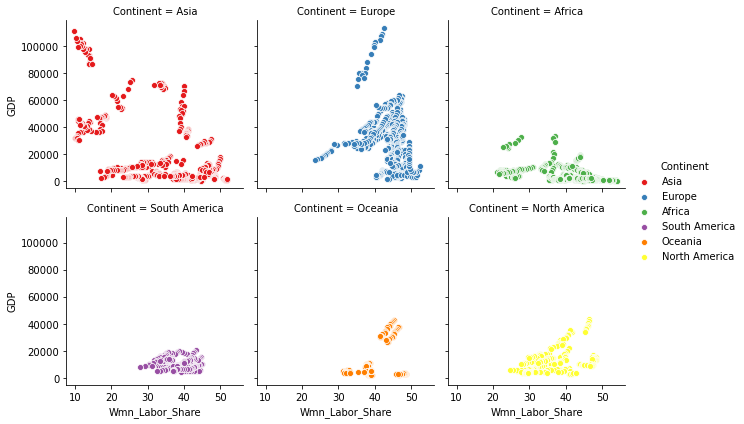

In [344]:
a = sns.FacetGrid(women_gdp_cont, col='Continent', col_wrap = 3, hue='Continent', palette='Set1')
a.map(sns.scatterplot,'Wmn_Labor_Share','GDP')
a.add_legend();

In [345]:
Japan = women_gdp_cont.query("Country == 'Japan'")
Japan = Japan[['Wmn_Labor_Share', 'GDP']].corr()
Japan.head()

,Wmn_Labor_Share,GDP
Wmn_Labor_Share,1.000000,0.747319
GDP,0.747319,1.000000


In [347]:
Singapore = women_gdp_cont.query("Country == 'Singapore'")
Singapore = Singapore[['Wmn_Labor_Share', 'GDP']].corr()
Singapore.head()

,Wmn_Labor_Share,GDP
Wmn_Labor_Share,1.000000,0.774655
GDP,0.774655,1.000000


In [349]:
China = women_gdp_cont.query("Country == 'China'")
China = China[['Wmn_Labor_Share', 'GDP']].corr()
China.head()

,Wmn_Labor_Share,GDP
Wmn_Labor_Share,1.000000,-0.976975
GDP,-0.976975,1.000000


In [350]:
UAE = women_gdp_cont.query("Country == 'United Arab Emirates'")
UAE = UAE[['Wmn_Labor_Share', 'GDP']].corr()
UAE.head()

,Wmn_Labor_Share,GDP
Wmn_Labor_Share,1.000000,-0.886984
GDP,-0.886984,1.000000
